# Metro-Bike-Share

Data Source: https://bikeshare.metro.net/about/data/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')  

# Import Image

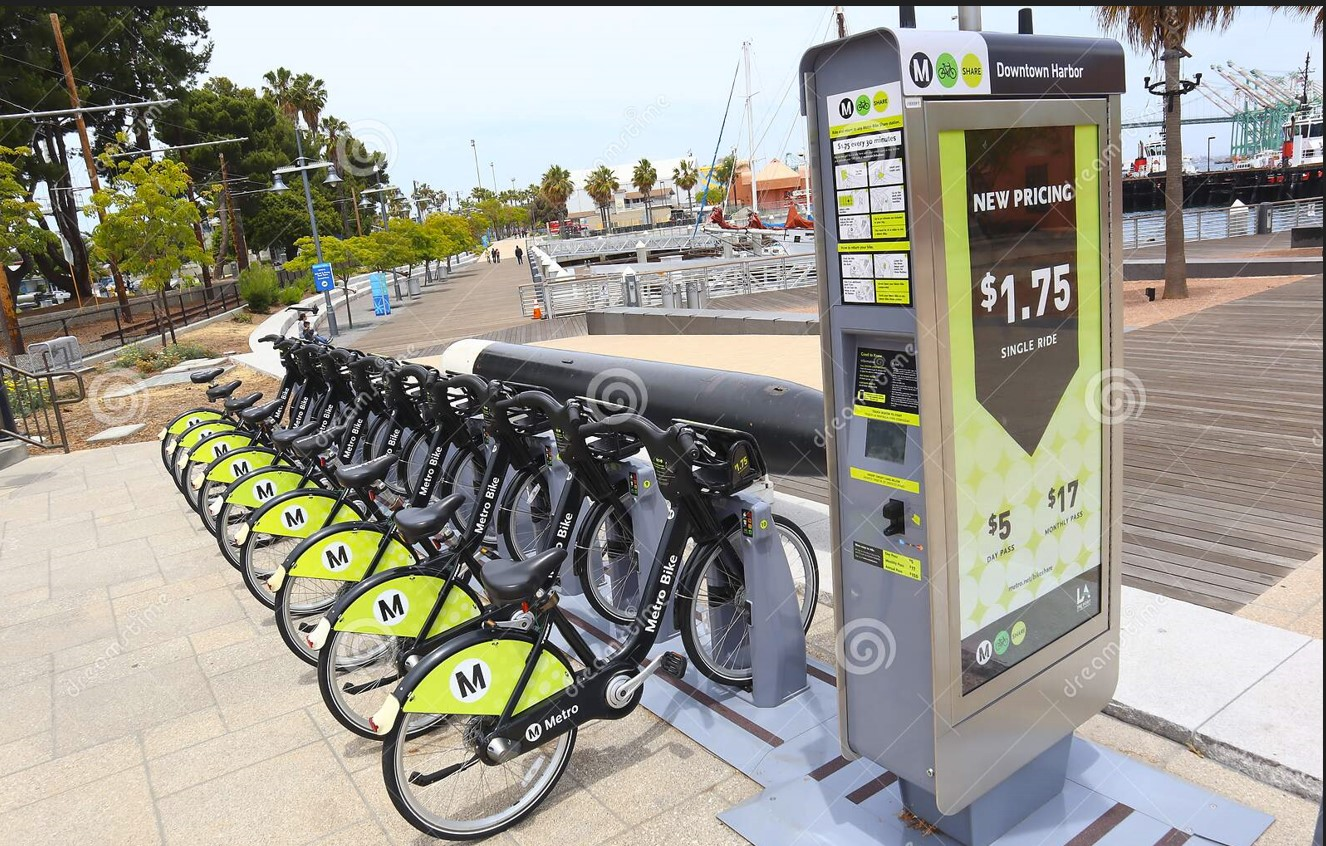

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'metro-bike-sharing.jpg')

display.Image(image_path)

# Import Datasets

Trip Data 

In [4]:
file_2021_q1 = pd.read_csv(os.path.join(path_directory, 'datasets', 'Metro Trip Data', 'metro-trips-2021-q1.csv'))
file_2021_q1.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,151713183,17,1/1/2021 1:45,1/1/2021 2:02,3005,34.04850,-118.25854,4304,34.06258,-118.29009,5894,1,One Way,Walk-up,standard
1,151713983,7,1/1/2021 2:35,1/1/2021 2:42,4390,34.06927,-118.29659,4456,34.05243,-118.30202,16901,365,One Way,Annual Pass,electric
2,151716483,8,1/1/2021 4:28,1/1/2021 4:36,3052,34.05110,-118.26456,4314,34.05771,-118.27976,6005,30,One Way,Monthly Pass,standard
3,151721185,208,1/1/2021 4:43,1/1/2021 8:11,3034,34.04206,-118.26338,3031,34.04470,-118.25244,5852,1,One Way,Walk-up,standard
4,151720984,129,1/1/2021 5:53,1/1/2021 8:02,4446,34.05323,-118.27842,4446,34.05323,-118.27842,12075,1,Round Trip,Walk-up,standard


In [5]:
file_2021_q2 = pd.read_csv(os.path.join(path_directory, 'datasets', 'Metro Trip Data', 'metro-trips-2021-q2.csv'))
file_2021_q2.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start station name,end station name
0,156638487,49,4/1/2021 4:35,4/1/2021 5:24,3014,34.05661,-118.23721,3030,34.05194,-118.24353,12215,1,One Way,One Day Pass,standard,Union Station West Portal,Main & 1st
1,156641187,8,4/1/2021 5:55,4/1/2021 6:03,4491,34.04744,-118.24794,3014,34.05661,-118.23721,5848,365,One Way,Annual Pass,standard,Main & Winston,Union Station West Portal
2,156641988,13,4/1/2021 6:31,4/1/2021 6:44,4478,34.10424,-118.27370,4401,34.07561,-118.29186,5940,1,One Way,Walk-up,standard,Tracy & Hyperion,Vermont & Beverly
3,156647409,23,4/1/2021 7:39,4/1/2021 8:02,3063,34.04804,-118.25374,4249,34.02030,-118.28118,20088,365,One Way,Annual Pass,standard,Pershing Square,Figueroa & McCarthy Way
4,156647604,29,4/1/2021 7:44,4/1/2021 8:13,4215,34.01431,-118.49134,4215,34.01431,-118.49134,15122,1,Round Trip,Walk-up,standard,Downtown Santa Monica E Line Station,Downtown Santa Monica E Line Station


In [6]:
file_2021_q3 = pd.read_csv(os.path.join(path_directory, 'datasets', 'Metro Trip Data', 'metro-trips-2021-q3.csv'))
file_2021_q3.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,165226338,19,7/1/2021 0:12,7/1/2021 0:31,4548,34.02683,-118.39352,4555,34.00587,-118.42916,20122,30,One Way,Monthly Pass,standard
1,165226638,22,7/1/2021 0:23,7/1/2021 0:45,4441,34.02662,-118.28181,4441,34.02662,-118.28181,17346,30,Round Trip,Monthly Pass,electric
2,165226838,26,7/1/2021 0:34,7/1/2021 1:00,4555,34.00587,-118.42916,4555,34.00587,-118.42916,14059,30,Round Trip,Monthly Pass,standard
3,165229638,17,7/1/2021 0:50,7/1/2021 1:07,4441,34.02662,-118.28181,4454,34.01790,-118.29172,17346,30,One Way,Monthly Pass,electric
4,165234338,15,7/1/2021 2:38,7/1/2021 2:53,4564,34.03535,-118.43414,4561,34.02006,-118.42268,15665,30,One Way,Monthly Pass,standard


In [7]:
file_2021_q4 = pd.read_csv(os.path.join(path_directory, 'datasets', 'Metro Trip Data', 'metro-trips-2021-q4.csv'))
file_2021_q4.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,169968837,16,9/1/2021 0:24,9/1/2021 0:40,4442,34.09800,-118.30047,4518,34.05797,-118.29975,20130,1,One Way,Walk-up,standard
1,169970937,19,9/1/2021 0:45,9/1/2021 1:04,4455,34.10936,-118.27181,4472,34.09260,-118.28093,16248,1,One Way,Walk-up,standard
2,169973037,8,9/1/2021 2:48,9/1/2021 2:56,3063,34.04804,-118.25374,3052,34.05110,-118.26456,13243,30,One Way,Monthly Pass,standard
3,169973038,24,9/1/2021 3:33,9/1/2021 3:57,3040,34.05357,-118.26636,3052,34.05110,-118.26456,6595,30,One Way,Monthly Pass,standard
4,169975138,9,9/1/2021 4:25,9/1/2021 4:34,3052,34.05110,-118.26456,3047,34.03998,-118.26640,13243,30,One Way,Monthly Pass,standard


In [8]:
file_2022_q1 = pd.read_csv(os.path.join(path_directory, 'datasets', 'Metro Trip Data', 'metro-trips-2022-q1.csv'))
file_2022_q1.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,179409976,20,1/1/2022 0:11,1/1/2022 0:31,3011,34.04113,-118.26798,3005,34.04850,-118.25854,14027,1,One Way,One Day Pass,standard
1,179410076,9,1/1/2022 0:31,1/1/2022 0:40,3010,34.03705,-118.25487,4475,34.04518,-118.24325,13902,1,One Way,Walk-up,standard
2,179410278,7,1/1/2022 0:39,1/1/2022 0:46,4210,33.98434,-118.47155,4214,33.99556,-118.48155,13928,365,One Way,Annual Pass,standard
3,179410276,5,1/1/2022 0:42,1/1/2022 0:47,3005,34.04850,-118.25854,3063,34.04804,-118.25374,14027,1,One Way,One Day Pass,standard
4,179411477,12,1/1/2022 0:55,1/1/2022 1:07,4534,34.10186,-118.32811,4442,34.09800,-118.30047,20162,365,One Way,Annual Pass,standard


In [9]:
file_2022_q2 = pd.read_csv(os.path.join(path_directory, 'datasets', 'Metro Trip Data', 'metro-trips-2022-q2.csv'))
file_2022_q2.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,187899916,6,4/1/2022 0:09,4/1/2022 0:15,3022,34.04607,-118.23309,4540,34.04776,-118.22541,15017,30,One Way,Monthly Pass,standard
1,187924550,429,4/1/2022 0:14,4/1/2022 7:23,3011,34.04113,-118.26798,3020,34.03105,-118.26709,6435,1,One Way,Walk-up,standard
2,187924549,429,4/1/2022 0:15,4/1/2022 7:24,3011,34.04113,-118.26798,3020,34.03105,-118.26709,12153,1,One Way,Walk-up,standard
3,187900515,27,4/1/2022 0:19,4/1/2022 0:46,4512,34.04381,-118.26497,4314,34.05771,-118.27976,6728,1,One Way,One Day Pass,standard
4,187903319,21,4/1/2022 0:49,4/1/2022 1:10,3008,34.04661,-118.26273,4293,34.06228,-118.27152,6153,1,One Way,Walk-up,standard


In [10]:
file_2022_q3 = pd.read_csv(os.path.join(path_directory, 'datasets', 'Metro Trip Data', 'metro-trips-2022-q3.csv'))
file_2022_q3.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,197704064,21,7/1/2022 0:00,7/1/2022 0:21,4606,34.16863,-118.37707,4601,34.16171,-118.37282,19544,1,One Way,Walk-up,electric
1,197703662,2,7/1/2022 0:02,7/1/2022 0:04,4406,34.10189,-118.30061,4442,34.09800,-118.30047,24302,30,One Way,Monthly Pass,electric
2,197704062,3,7/1/2022 0:19,7/1/2022 0:22,3082,34.04652,-118.23741,3082,34.04652,-118.23741,19941,1,Round Trip,Walk-up,electric
3,197704162,2,7/1/2022 0:23,7/1/2022 0:25,3082,34.04652,-118.23741,3082,34.04652,-118.23741,17445,1,Round Trip,Walk-up,electric
4,197708062,39,7/1/2022 0:26,7/1/2022 1:05,3082,34.04652,-118.23741,3063,34.04804,-118.25374,19941,1,One Way,Walk-up,electric


Station Table

In [11]:
file_stat = pd.read_csv(os.path.join(path_directory, 'datasets', 'Metro Trip Data', 'metro-bike-share-stations-2022-10-01.csv'), encoding='cp1252')
file_stat.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active


# Concatenate Dataframes

In [12]:
df = pd.concat([file_2021_q1, file_2021_q2, file_2021_q3, file_2021_q4, file_2022_q1, file_2022_q2, file_2022_q3])\
       .reset_index()\
       .drop(columns={'index': 'index'})

df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start station name,end station name
0,151713183,17,1/1/2021 1:45,1/1/2021 2:02,3005,34.04850,-118.25854,4304,34.06258,-118.29009,5894,1,One Way,Walk-up,standard,NaN,NaN
1,151713983,7,1/1/2021 2:35,1/1/2021 2:42,4390,34.06927,-118.29659,4456,34.05243,-118.30202,16901,365,One Way,Annual Pass,electric,NaN,NaN
2,151716483,8,1/1/2021 4:28,1/1/2021 4:36,3052,34.05110,-118.26456,4314,34.05771,-118.27976,6005,30,One Way,Monthly Pass,standard,NaN,NaN
3,151721185,208,1/1/2021 4:43,1/1/2021 8:11,3034,34.04206,-118.26338,3031,34.04470,-118.25244,5852,1,One Way,Walk-up,standard,NaN,NaN
4,151720984,129,1/1/2021 5:53,1/1/2021 8:02,4446,34.05323,-118.27842,4446,34.05323,-118.27842,12075,1,Round Trip,Walk-up,standard,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430930,212443562,4,9/30/2022 23:36,9/30/2022 23:40,3042,34.04930,-118.23881,3022,34.04607,-118.23309,24053,30,One Way,Monthly Pass,electric,NaN,NaN
430931,212453772,45,9/30/2022 23:42,10/1/2022 0:27,4582,33.98099,-118.41488,4580,33.98292,-118.41093,13439,30,One Way,Monthly Pass,standard,NaN,NaN
430932,212443863,10,9/30/2022 23:49,9/30/2022 23:59,4410,34.06335,-118.29680,4410,34.06335,-118.29680,22800,30,Round Trip,Monthly Pass,electric,NaN,NaN
430933,212443862,5,9/30/2022 23:52,9/30/2022 23:57,4569,34.02655,-118.40846,4567,34.02018,-118.40403,22173,1,One Way,Walk-up,electric,NaN,NaN


In [13]:
df.shape

(430935, 17)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430935 entries, 0 to 430934
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              430935 non-null  int64  
 1   duration             430935 non-null  int64  
 2   start_time           430935 non-null  object 
 3   end_time             430935 non-null  object 
 4   start_station        430935 non-null  int64  
 5   start_lat            430693 non-null  float64
 6   start_lon            430693 non-null  float64
 7   end_station          430935 non-null  int64  
 8   end_lat              421014 non-null  float64
 9   end_lon              421014 non-null  float64
 10  bike_id              430935 non-null  object 
 11  plan_duration        430935 non-null  int64  
 12  trip_route_category  430935 non-null  object 
 13  passholder_type      430776 non-null  object 
 14  bike_type            430935 non-null  object 
 15  start station nam

In [15]:
df.dtypes.value_counts()

object     8
int64      5
float64    4
dtype: int64

# Helper Functions

In [16]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.0f' % (x * 1)

format_orig = FuncFormatter(original)



def cntplot(data: pd.DataFrame, orient: str, palette: str|list|dict, dodge: bool, x=None, y=None, hue=None, order=None, hue_order=None, color=None, ax=None):
  '''
  
  Helper function for plotting countplots

  Parameters
  ----------

  data: pd.DataFrame
        pandas dataframe

  orient: str
        orientation of the plot
  
  palette: palette name, list or dict
        colors to use for different levels

  dodge: bool
        whether elements should be shifted along the categorial axis

  x,y,hue: None
        inputs for plotting long-form data

  Returns: ax
        Returns the axes object with the plot drawn
        
  '''

  return sns.countplot(data=data, x=x, y=y, hue=hue, order=order, hue_order=hue_order, orient=orient, color=color, palette=palette, dodge=dodge, ax=ax)



def plot_pie(shadow: bool, startangle: float, normalize: bool, x=None, labels=None, explode=None, autopct=None, data=None):
      '''
      Helper function for plotting pie charts

      Parameters
      ----------

      data: pd.DataFrame
           pandas dataframe

      x: None
           array like
      
      explode: None
            fraction of radius to offset each wedge
      
      autopct: None
            string function to label chart

      shadow: True
            draw shadow beneath the pie
      
      normalize: bool
            when true, makes a full pie 

      startangle: float
            angle by which the start of the pie is rotated
            

      Returns: pie chart
      
      '''

      return plt.pie(x=x, explode=explode, labels=labels, autopct=autopct, shadow=shadow, startangle=startangle, normalize=normalize, data=data)




# helper function for plotting bar charts
def plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, palette=palette,
        ci=ci, 
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_bar



# helper function to plot line charts
def plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, palette=palette, 
        style=style, 
        ci=ci, ax=ax)

    # label plot axes
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot 
    sns.despine(bottom=True, left=True)

    return plot_line



# helper function to get specific date range
def fetch_data(data, ascending=None, before=None, after=None, rule=None):
    return data.sort_index(ascending=ascending).truncate(before=before, after=after).resample(rule=rule)


# helper function to plot specific date range
def plot_date_rng(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data,
        x=x, y=y,
        hue=hue, palette=palette, 
        size=size, style=style,
        ci=None, ax=ax
    )

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_date_rng

In [17]:
df.describe(include='object')

,start_time,end_time,bike_id,trip_route_category,passholder_type,bike_type,start station name,end station name
count,430935,430935,430935,430935,430776,430935,59081,59081
unique,282560,269654,4207,2,5,3,215,215
top,9/10/2021 17:31,9/12/2021 12:45,16837,One Way,Monthly Pass,standard,Ocean Front Walk & Navy,Ocean Front Walk & Navy
freq,14,22,1078,338613,208525,321523,3183,3088


In [18]:
df['trip_route_category'].value_counts()

One Way       338613
Round Trip     92322
Name: trip_route_category, dtype: int64

[Text(0.5, 1.0, 'Countplot of Trip Categories')]

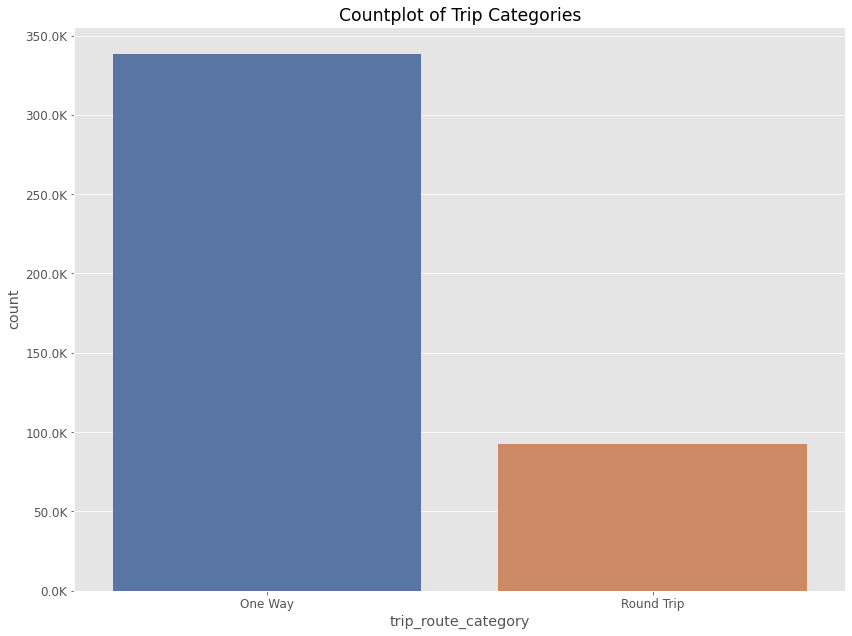

In [19]:
fig, ax = plt.subplots()

cntplot(data=df, x='trip_route_category', orient='v', palette='deep', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))
ax.set(title='Countplot of Trip Categories')

[Text(0.5, 1.0, 'Pie chart of the relative frequency for each trip route category')]

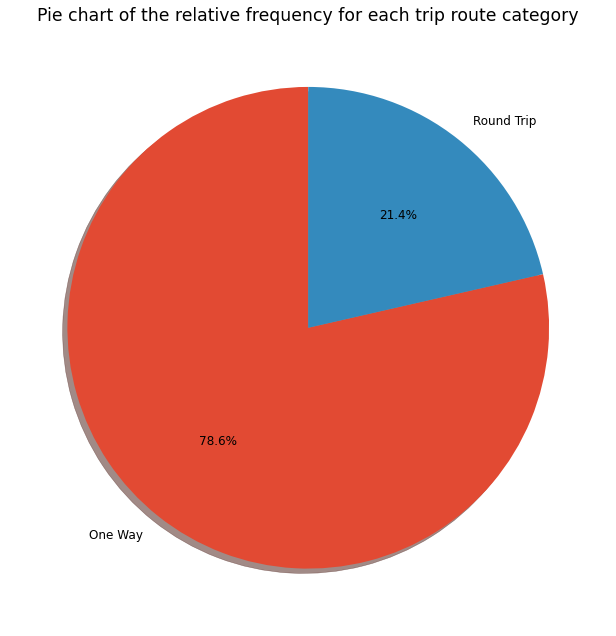

In [20]:
fig, ax = plt.subplots()

plot_pie(
  x=df['trip_route_category'].value_counts(True).values, labels=df['trip_route_category'].value_counts(True).keys(), autopct='%1.1f%%',
  shadow=True, startangle=90, normalize=True, explode=[0, 0]
)

ax.set(title='Pie chart of the relative frequency for each trip route category')

In [21]:
df['passholder_type'].value_counts()

Monthly Pass    208525
Walk-up         130305
One Day Pass     50400
Annual Pass      41540
Testing              6
Name: passholder_type, dtype: int64

[Text(0.5, 1.0, 'Countplot of Passholder Types')]

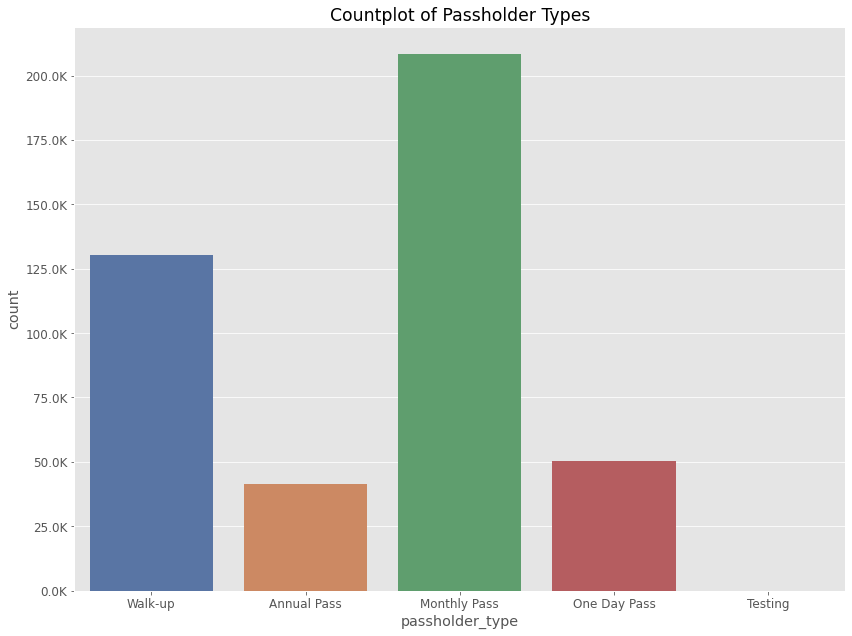

In [22]:
fig, ax = plt.subplots()

cntplot(data=df, x='passholder_type', orient='v', palette='deep', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))
ax.set(title='Countplot of Passholder Types')

[Text(0.5, 1.0, 'Pie chart of the relative frequency for each passholder type')]

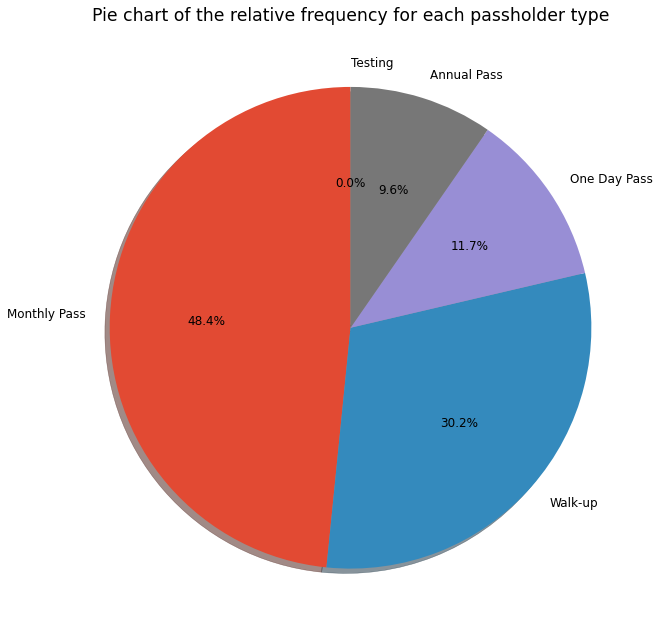

In [23]:
fig, ax = plt.subplots()

plot_pie(
  x=df['passholder_type'].value_counts(True).values, labels=df['passholder_type'].value_counts(True).keys(), autopct='%1.1f%%',
  shadow=True, startangle=90, normalize=True, explode=[0, 0, 0, 0, 0]
)

ax.set(title='Pie chart of the relative frequency for each passholder type')

In [24]:
df['bike_type'].value_counts()

standard    321523
electric    107245
smart         2167
Name: bike_type, dtype: int64

[Text(0.5, 1.0, 'Countplot of Bike Type')]

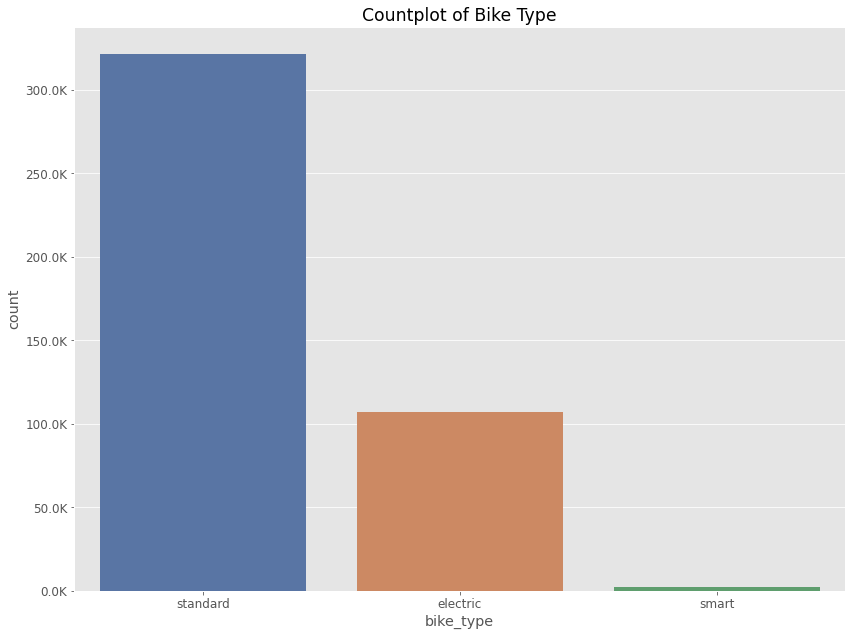

In [25]:
fig, ax = plt.subplots()

cntplot(data=df, x='bike_type', orient='v', palette='deep', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))
ax.set(title='Countplot of Bike Type')

[Text(0.5, 1.0, 'Pie chart of the relative frequency for each bike type')]

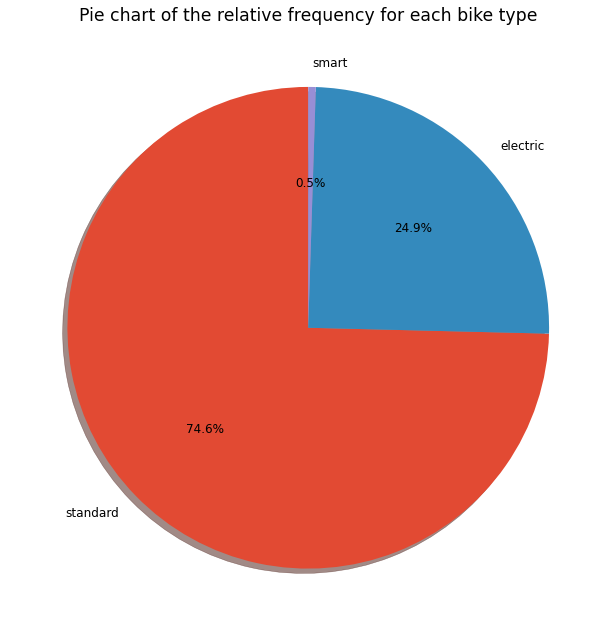

In [26]:
fig, ax = plt.subplots()

plot_pie(
  x=df['bike_type'].value_counts(True).values, labels=df['bike_type'].value_counts(True).keys(), autopct='%1.1f%%',
  shadow=True, startangle=90, normalize=True, explode=[0, 0, 0]
)

ax.set(title='Pie chart of the relative frequency for each bike type')

In [27]:
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime)   # convert dates to pandas datetime
df[['start_time', 'end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [28]:
df['day_name'] = df['start_time'].dt.day_name()                                          # extract day name    
df['day'] = df['start_time'].dt.day                                                      # extract day
df['month'] = df['start_time'].dt.month                                                  # extract month
df['week'] = df['start_time'].dt.week                                                    # extract week
df['year'] = df['start_time'].dt.year                                                    # extract year

df[['day_name', 'day', 'month', 'week', 'year']]

,day_name,day,month,week,year
0,Friday,1,1,53,2021
1,Friday,1,1,53,2021
2,Friday,1,1,53,2021
3,Friday,1,1,53,2021
4,Friday,1,1,53,2021
...,...,...,...,...,...
430930,Friday,30,9,39,2022
430931,Friday,30,9,39,2022
430932,Friday,30,9,39,2022
430933,Friday,30,9,39,2022


In [29]:
# change day_name to categorical
ordered_dayname = ['Monday', 'Tuesday', 'Wednesday', 'Thursday' , 'Friday', 'Saturday', 'Sunday']

df['day_name'] = pd.Categorical(df['day_name'], ordered_dayname)

df['day_name'].dtypes

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=False)

In [30]:
df['start station name'].value_counts(False)[:20]                     # top 20 start station names

Ocean Front Walk & Navy                 3183
Ocean Front Walk & North Venice         2681
Downtown Santa Monica E Line Station    2446
Toes Beach at Culver Blvd               1654
7th & Flower                            1644
Dockweiler Beach at Imperial Hwy        1201
Windward & Main                         1086
Rose & Main                              986
Figueroa & 8th                           888
Pacific & North Venice                   882
7th & Spring                             794
Main & Winston                           643
Grand & 8th                              638
7th & Bixel                              637
Union Station West Portal                603
Abbot Kinney & Cadiz                     588
Broadway & 3rd                           555
Pershing Square                          527
1st & Central                            482
Olive & 8th                              472
Name: start station name, dtype: int64

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

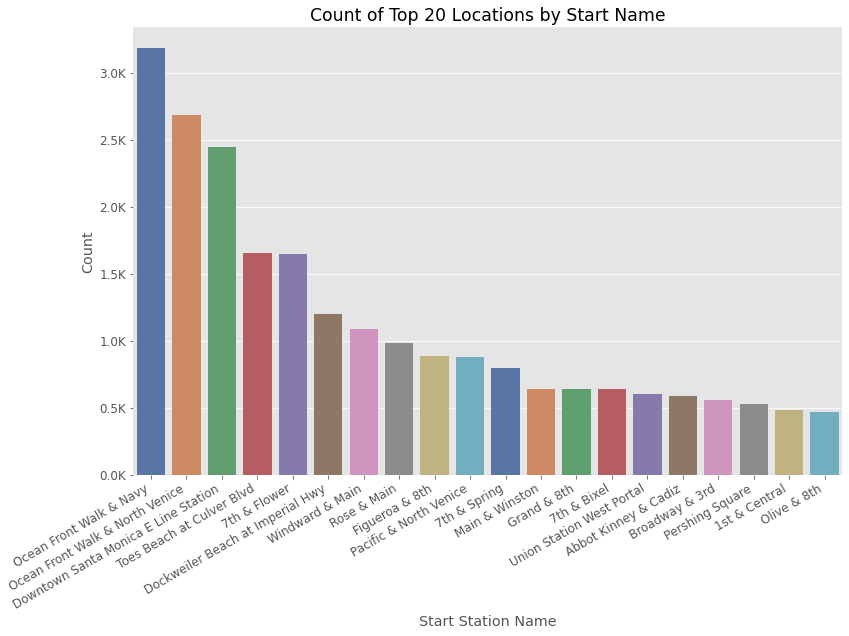

In [31]:
plot_bar(
    x=df['start station name'].value_counts().keys()[:20], y=df['start station name'].value_counts().values[:20],
    xlabel='Start Station Name', ylabel='Count', title='Count of Top 20 Locations by Start Name', palette='deep',
    formatter=format_tsd
)

In [32]:
df['end station name'].value_counts(False)[:20]                     # top 20 end station names

Ocean Front Walk & Navy                 3088
Downtown Santa Monica E Line Station    2922
Ocean Front Walk & North Venice         2546
7th & Flower                            1742
Toes Beach at Culver Blvd               1635
Virtual Station                         1500
Dockweiler Beach at Imperial Hwy        1153
Figueroa & 8th                           991
Windward & Main                          950
7th & Spring                             825
Rose & Main                              760
Pacific & North Venice                   733
17th St / SMC E Line Station             669
Main & Winston                           665
Union Station West Portal                639
Grand & 8th                              562
Broadway & 3rd                           542
Abbot Kinney & Cadiz                     527
Pershing Square                          507
7th & Bixel                              499
Name: end station name, dtype: int64

<function __main__.plot_bar(x, y, data=None, hue=None, palette=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None)>

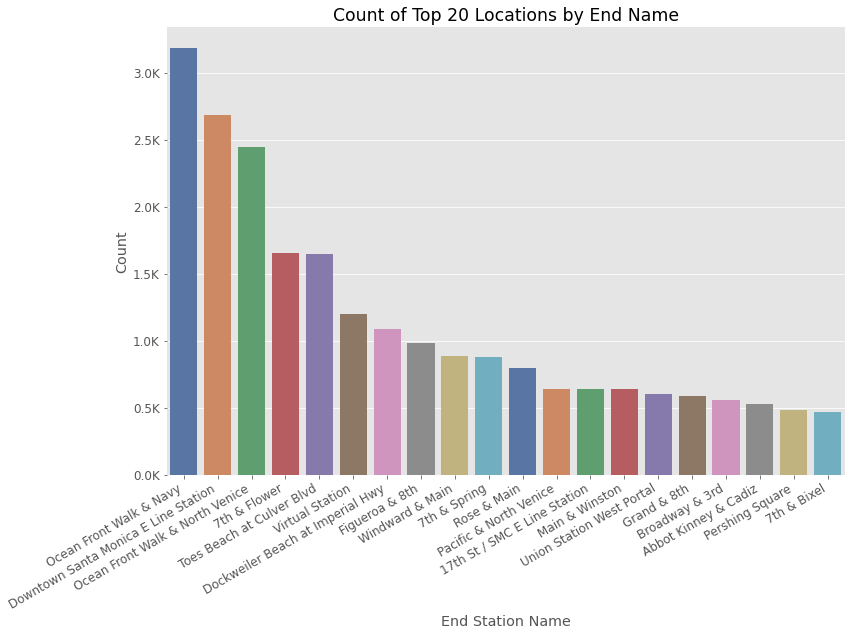

In [33]:
plot_bar(
    x=df['end station name'].value_counts().keys()[:20], y=df['start station name'].value_counts().values[:20],
    xlabel='End Station Name', ylabel='Count', title='Count of Top 20 Locations by End Name', palette='deep',
    formatter=format_tsd
)

In [34]:
# station information analysis
df1 = file_stat.rename(
                       columns={
                                 'Station_ID': 'station_id',
                                 'Station_Name': 'station_name',
                                 'Go_live_date': 'go_live_date',
                                 'Region ': 'region',
                                 'Status': 'status'
                               }
                      )

df1.head()

,station_id,station_name,go_live_date,region,status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active


In [35]:
df1['region'].value_counts()

DTLA               173
Westside           129
North Hollywood     35
Pasadena            31
Port of LA          13
Free Bikes           2
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

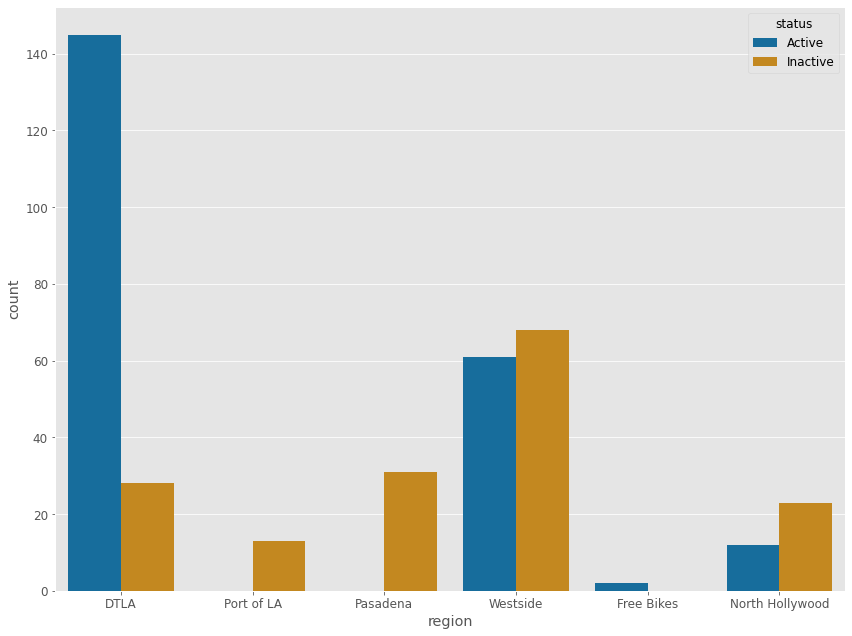

In [36]:
cntplot(
  data=df1, x='region', hue='status', orient='v', palette='colorblind', dodge=True
)

# Missing Data Exploration

In [37]:
df.isna().sum()                                                 # less than 1% missing data in (longitute and latitude) columns

trip_id                     0
duration                    0
start_time                  0
end_time                    0
start_station               0
start_lat                 242
start_lon                 242
end_station                 0
end_lat                  9921
end_lon                  9921
bike_id                     0
plan_duration               0
trip_route_category         0
passholder_type           159
bike_type                   0
start station name     371854
end station name       371854
day_name                    0
day                         0
month                       0
week                        0
year                        0
dtype: int64

<AxesSubplot:>

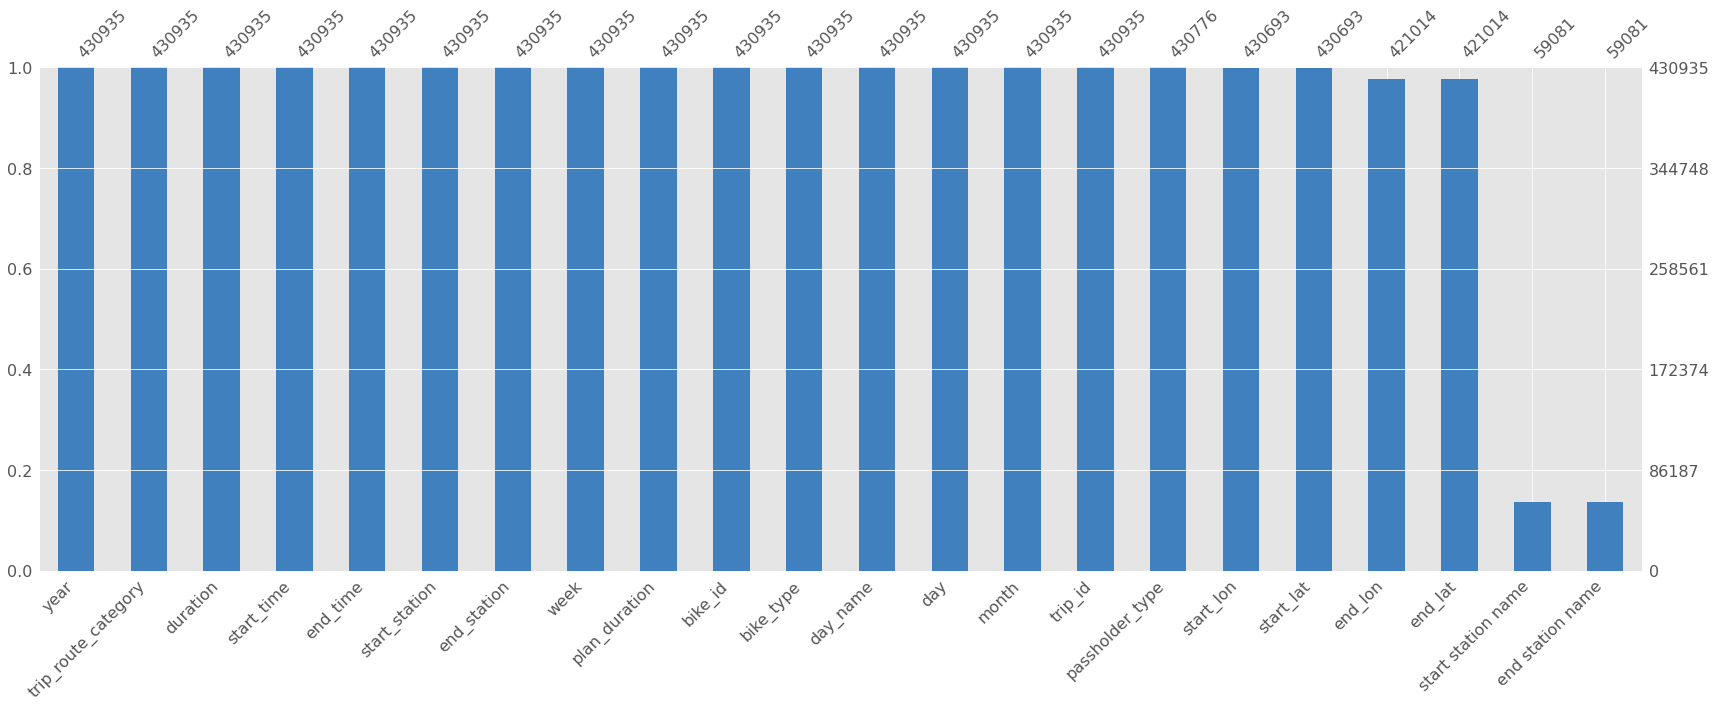

In [38]:
msno.bar(df, labels=True, sort='descending', color=(0.25, 0.50, 0.75))

<AxesSubplot:>

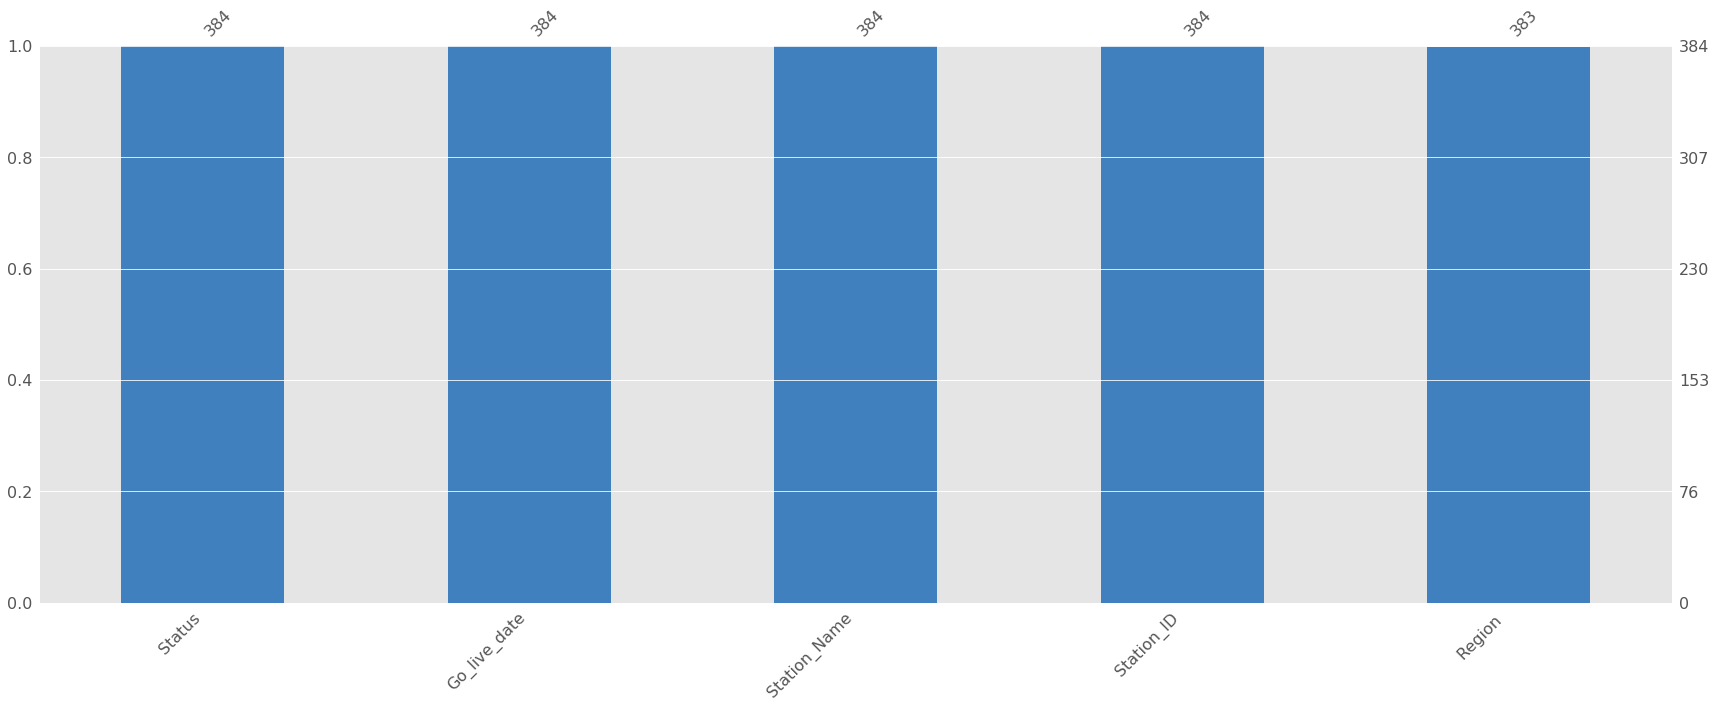

In [39]:
msno.bar(file_stat, labels=True, sort='descending', color=(0.25, 0.50, 0.75))

The kind of bike used on the trip, including standard pedal-powered bikes, electric assist bikes, or smart bikes

<AxesSubplot:xlabel='end_lon', ylabel='end_lat'>

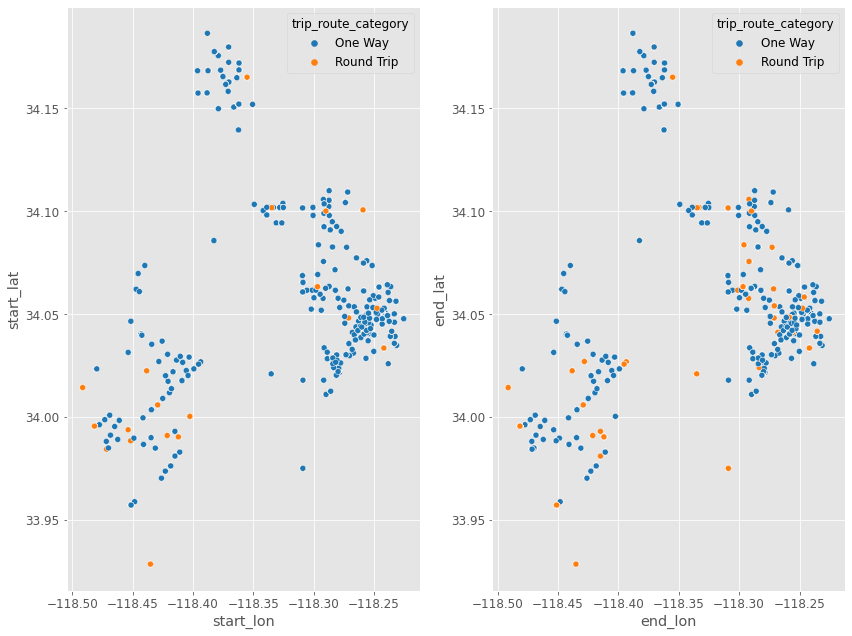

In [40]:
# start_lat: The latitude of the station where the trip originated
# start_lon: The longitude of the station where the trip originated
# end_lat: The latitude of the station where the trip terminated
# end_lon: The longitude of the station where the trip terminated


# assign start and end coordinates
start_lon, start_lat  = df['start_lon'], df['start_lat']
end_lon, end_lat = df['end_lon'], df['end_lat']

# create figure axis
fig, (ax1, ax2) = plt.subplots(1, 2)

# plot starting coordinates
sns.scatterplot(
  data=df,
  x=start_lon, y=start_lat, 
  hue='trip_route_category', palette='tab10',
  ci=None, 
  ax=ax1
)

# plot ending coordinates
sns.scatterplot(
  data=df,
  x=end_lon, y=end_lat,  
  hue='trip_route_category', palette='tab10',
  ci=None,
  ax=ax2
)

In [41]:
df['duration'].describe()

count    430935.00000
mean         44.27508
std         129.63076
min           1.00000
25%           9.00000
50%          18.00000
75%          34.00000
max        1440.00000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Density'>

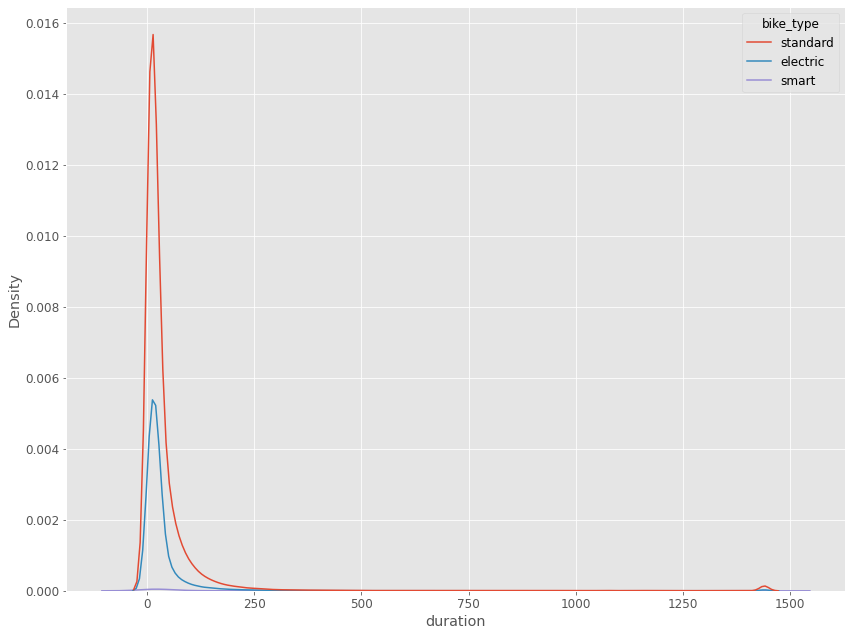

In [42]:
sns.kdeplot(data=df, x='duration', hue='bike_type')

<AxesSubplot:xlabel='duration', ylabel='Density'>

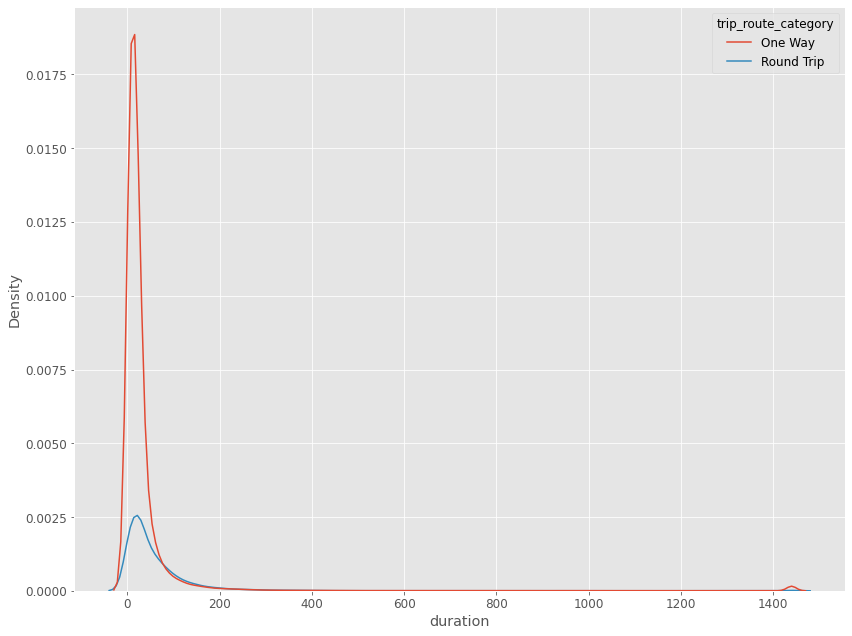

In [43]:
sns.kdeplot(data=df, x='duration', hue='trip_route_category')

<AxesSubplot:xlabel='duration', ylabel='Density'>

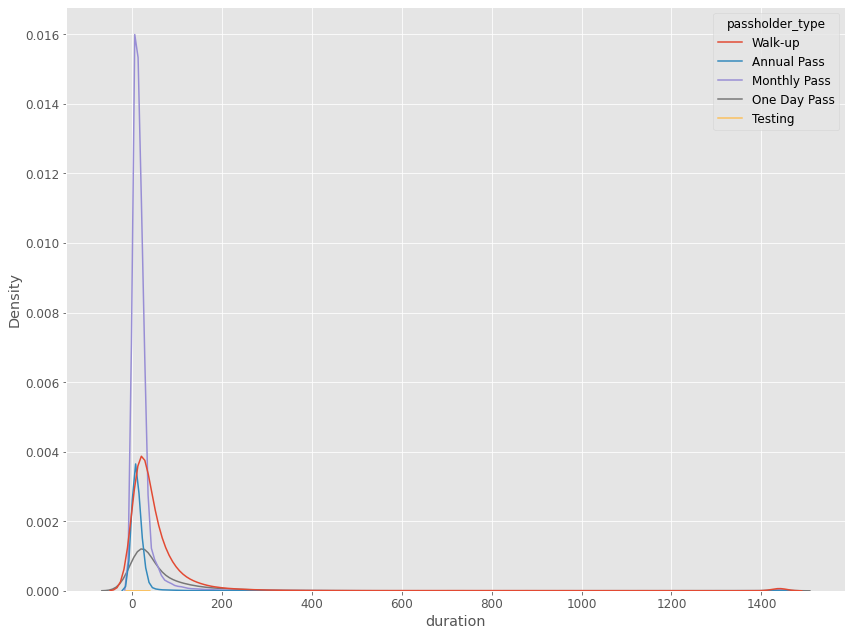

In [44]:
sns.kdeplot(data=df, x='duration', hue='passholder_type')

# Time Resampling

In [45]:
df_idx = df[['start_time', 'end_time', 'duration', 'trip_route_category', 'passholder_type', 'bike_type']].set_index('start_time')
df_idx

,end_time,duration,trip_route_category,passholder_type,bike_type
start_time,,,,,
2021-01-01 01:45:00,2021-01-01 02:02:00,17,One Way,Walk-up,standard
2021-01-01 02:35:00,2021-01-01 02:42:00,7,One Way,Annual Pass,electric
2021-01-01 04:28:00,2021-01-01 04:36:00,8,One Way,Monthly Pass,standard
2021-01-01 04:43:00,2021-01-01 08:11:00,208,One Way,Walk-up,standard
2021-01-01 05:53:00,2021-01-01 08:02:00,129,Round Trip,Walk-up,standard
...,...,...,...,...,...
2022-09-30 23:36:00,2022-09-30 23:40:00,4,One Way,Monthly Pass,electric
2022-09-30 23:42:00,2022-10-01 00:27:00,45,One Way,Monthly Pass,standard
2022-09-30 23:49:00,2022-09-30 23:59:00,10,Round Trip,Monthly Pass,electric


In [46]:
df_idx.describe()

,duration
count,430935.00000
mean,44.27508
std,129.63076
min,1.00000
25%,9.00000
50%,18.00000
75%,34.00000
max,1440.00000


<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

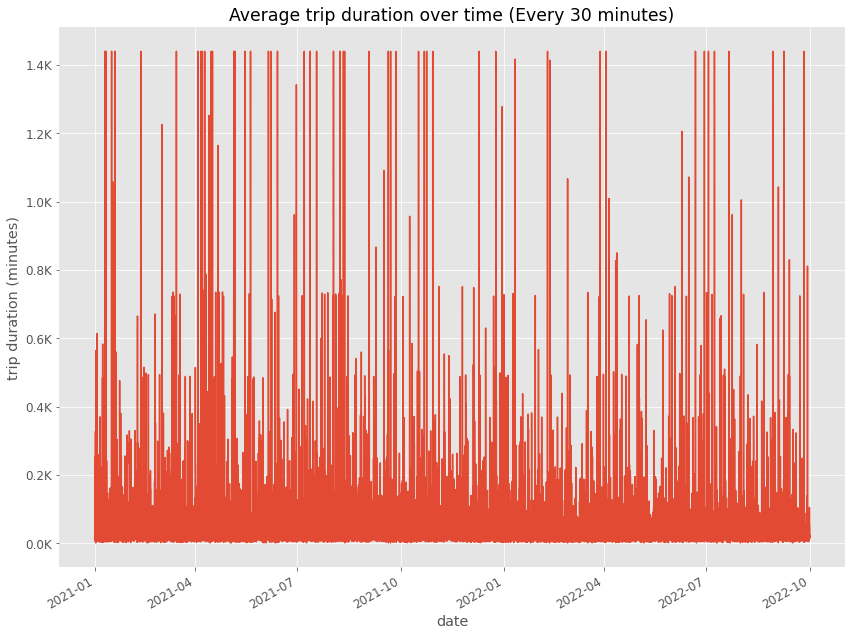

In [47]:
plot_line(
    x='start_time', y='duration', ci=None, 
    data=df_idx.resample('30T').agg(np.mean),                            # total duration sampled every 30 minutes
    title='Average trip duration over time (Every 30 minutes)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

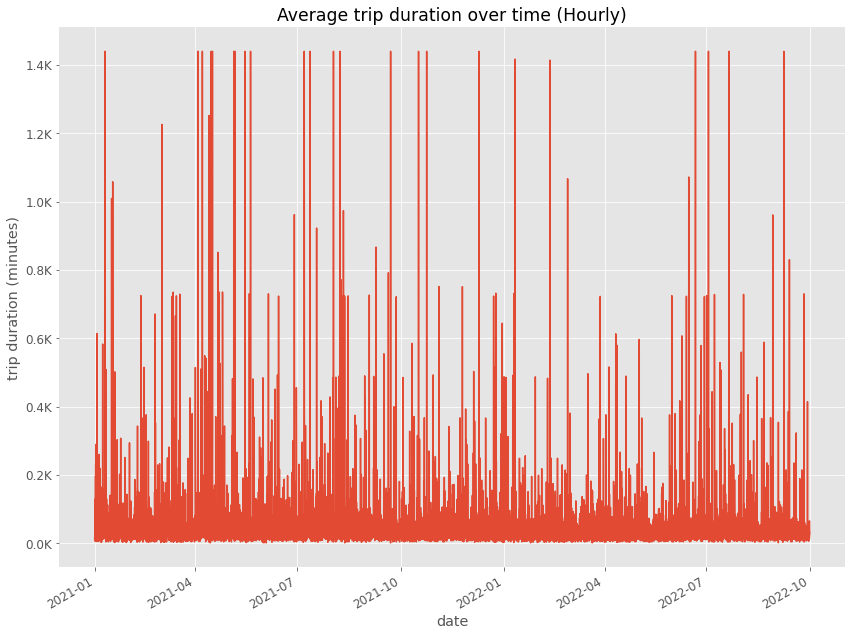

In [48]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('1H').agg(np.mean),                            # total duration sampled hourly
    title='Average trip duration over time (Hourly)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

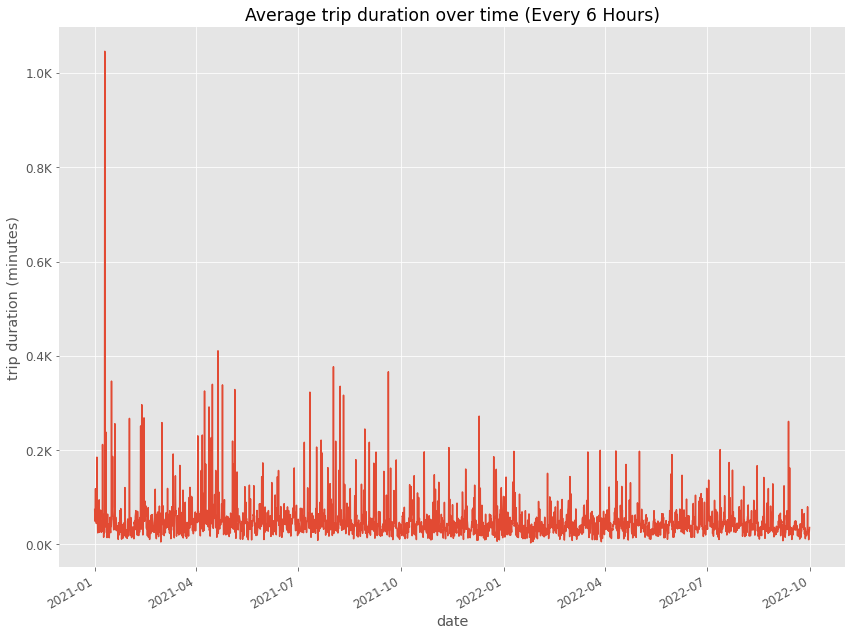

In [49]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('6H').agg(np.mean),                            # total duration sampled every 6 hours
    title='Average trip duration over time (Every 6 Hours)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

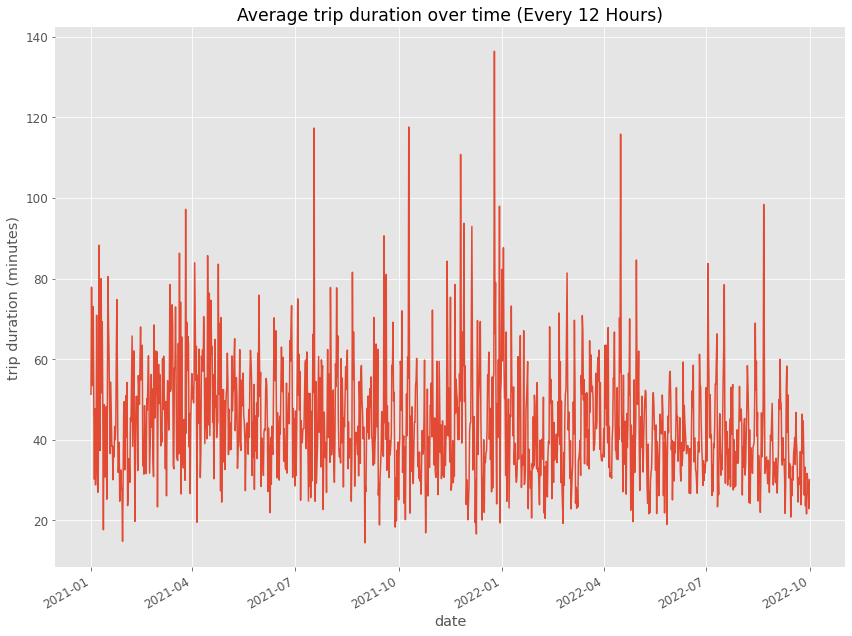

In [50]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('12H').agg(np.mean),                            # total duration sampled every 12 hours
    title='Average trip duration over time (Every 12 Hours)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_orig
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

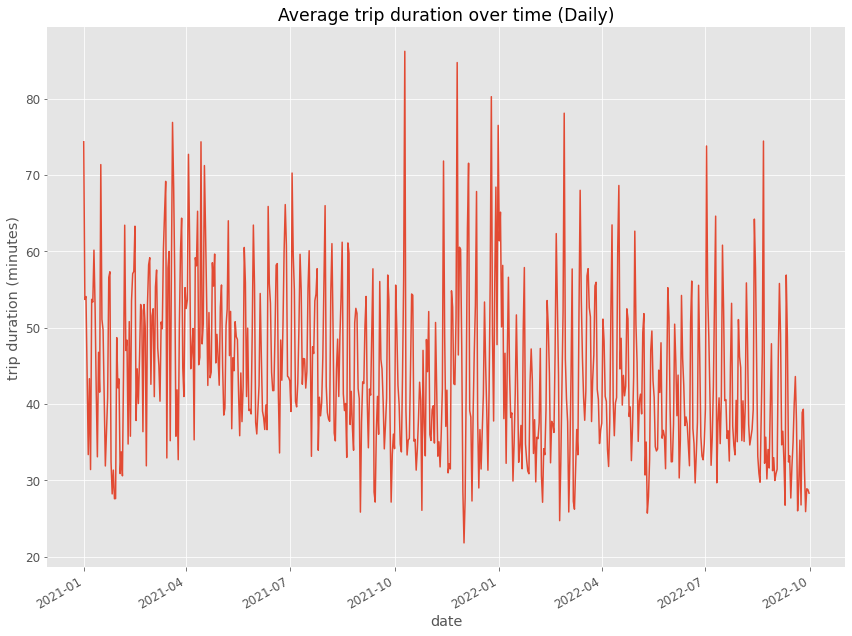

In [51]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('D').agg(np.mean),                            # total duration sampled daily
    title='Average trip duration over time (Daily)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_orig
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

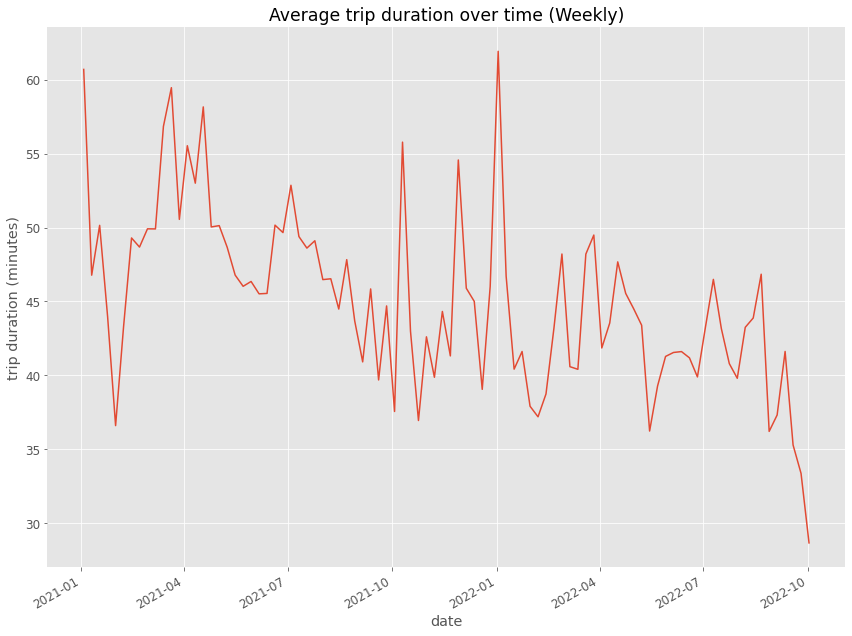

In [52]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('W').agg(np.mean),                            # total duration sampled weekly
    title='Average trip duration over time (Weekly)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_orig
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, style=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

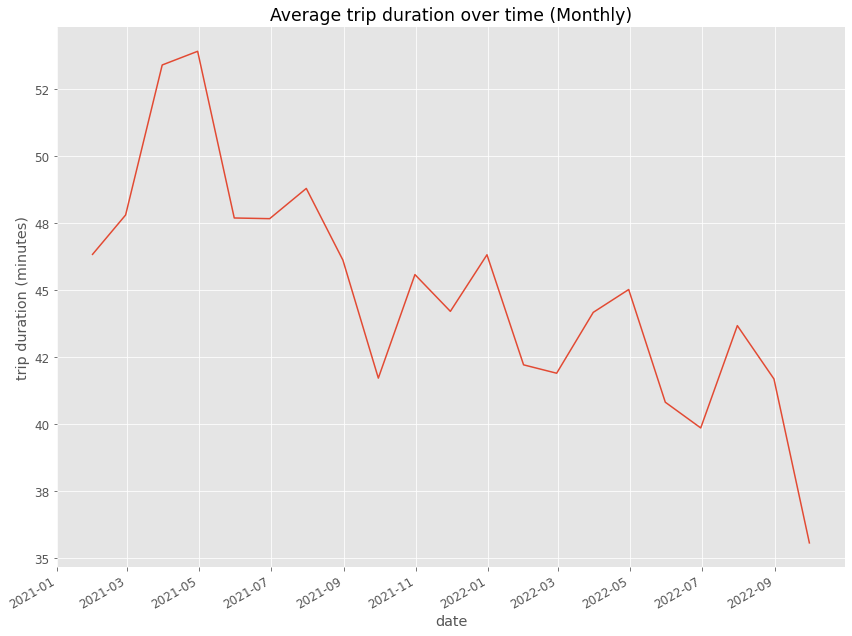

In [53]:
plot_line(
    x='start_time', y='duration', ci=None,
    data=df_idx.resample('M').agg(np.mean),                            # total duration sampled monthly
    title='Average trip duration over time (Monthly)', xlabel='date', ylabel='trip duration (minutes)', 
    formatter=format_orig
)

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, palette=None, size=None, style=None, title=None, xlabel=None, ylabel=None, formatter=None)>

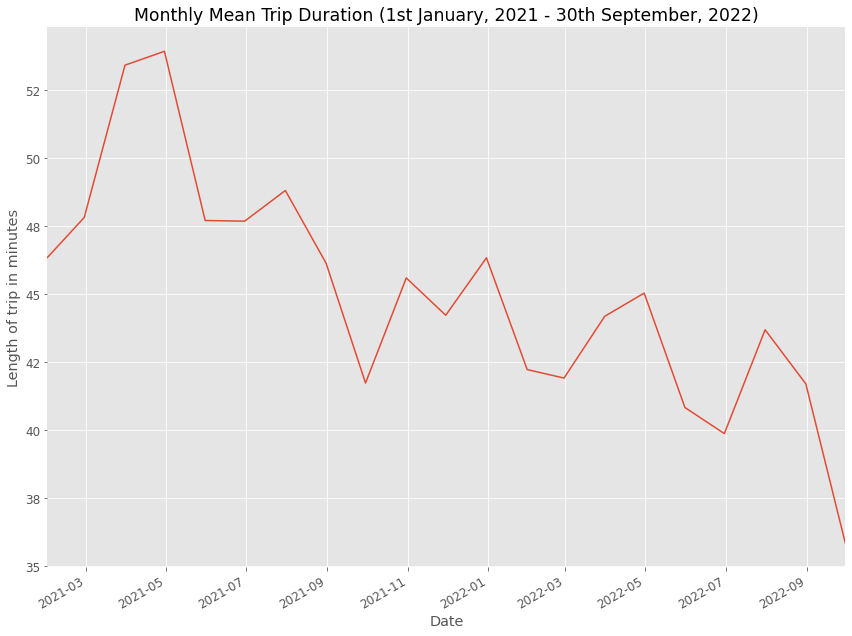

In [54]:
plot_date_rng(
    data=fetch_data(data=df_idx, ascending=True, before='2021-01-01', after='2022-09-30', rule='M').agg(np.mean),
    x='start_time', y='duration',
    xlabel='Date', ylabel='Length of trip in minutes', title='Monthly Mean Trip Duration (1st January, 2021 - 30th September, 2022)',
    formatter=format_orig
)